In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
# Define the generator model
def make_generator_model():
    model = keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(512, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

In [ ]:
# Define the discriminator model
def make_discriminator_model():
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1))

    return model

In [ ]:
# Define the loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)


In [ ]:
# Define the optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
# Create the GAN model
def make_gan_model(generator, discriminator):
    model = keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

In [ ]:
# Instantiate the models and the GAN model
generator = make_generator_model()
discriminator = make_discriminator_model()
gan_model = make_gan_model(generator, discriminator)

In [ ]:
# Define the training loop
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# Train the model
batch_size = 128
epochs = 100
noise_dim = 100

(train_images, train_labels), (_, _) = keras.datasets.fashion_mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 

for epoch in range(epochs):
    for i in range(train_images.shape[0] // batch_size):
        batch_images = train_images[i * batch_size : (i+1) * batch_size]
        train_step(batch_images)

    if epoch % 10 == 0:
        print(f'Epoch {epoch+1}/{epochs}')
        noise = tf.random.normal([1, noise_dim])
        generated_image = generator(noise, training=False)
        generated_image = generated_image.numpy().reshape

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/100
Epoch 11/100
Epoch 21/100
Epoch 31/100
Epoch 41/100
Epoch 51/100
Epoch 61/100
Epoch 71/100
Epoch 81/100
Epoch 91/100


In [ ]:
# Generate images using the trained generator
num_images_to_generate = 64
noise = tf.random.normal([num_images_to_generate, noise_dim])
generated_images = generator(noise, training=False)

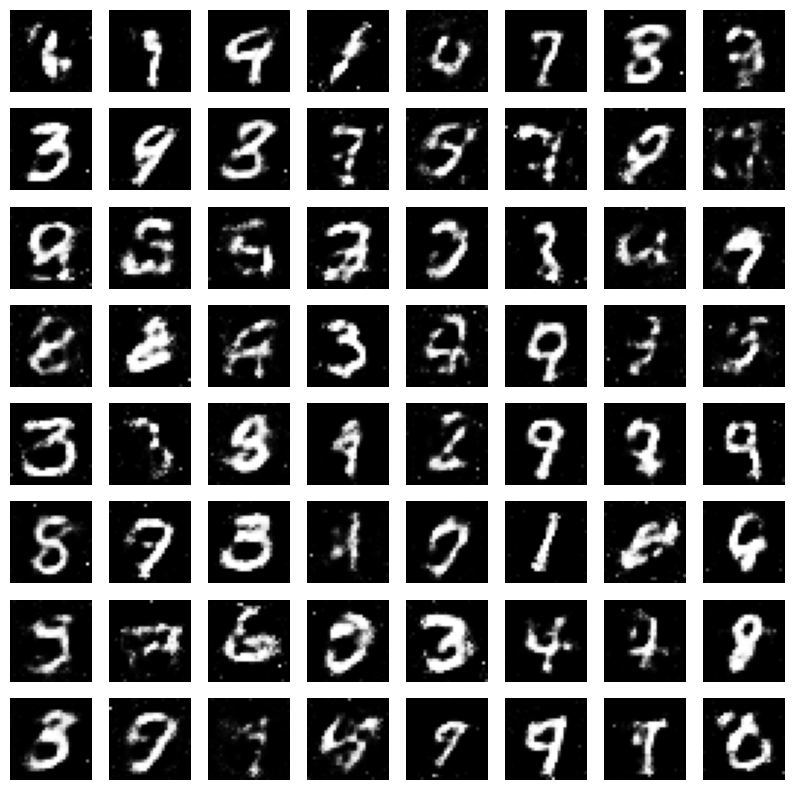

In [ ]:
# Plot the generated images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(8, 8, figsize=(10, 10))
axs = axs.flatten()
for i in range(num_images_to_generate):
    axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
    axs[i].axis('off')
plt.show()